In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt

from helpers import utils
import app.transform_eurostat as eurostat

plt.rc('figure', figsize=(11.69,8.27))

In [19]:
file_path = utils.get_project_path('data', 'raw', 'eurostat', 'UK.csv')
df = (
    eurostat.read_datafile(file_path)
    .rename(columns={'UK': 'pax'})
    .sort_index()
    .truncate(before='2013-01-01', after='2016-12-31')
)
df.sample(5)

INFO:app.transform_eurostat:Parsing UK


,pax
2016-06-01,23671944.0
2014-04-01,18075203.0
2014-08-01,23782567.0
2014-11-01,14979167.0
2016-02-01,15602504.0


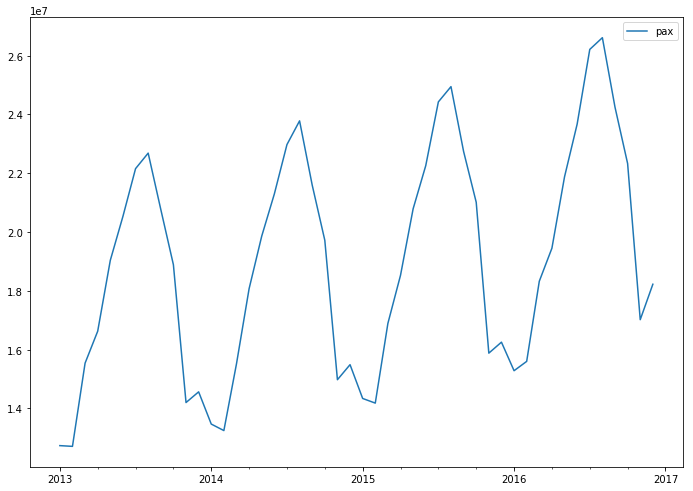

In [21]:
df.plot();

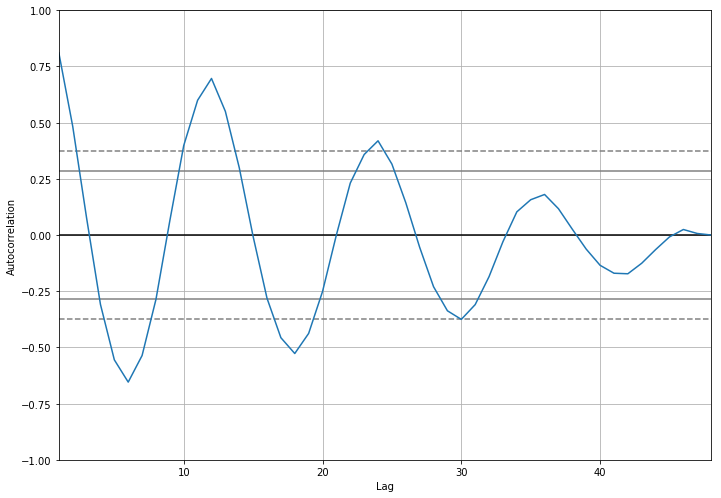

In [23]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.pax)
plt.show();

In [1]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


RMSE= 1417782.462
RMSE= 1933475.198


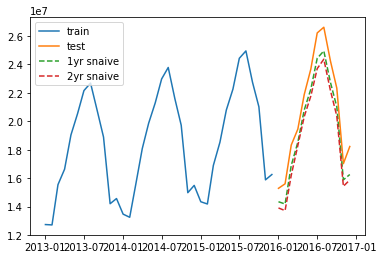

In [26]:
def evaluate_model(df):
    train = df.truncate(before='2013-01-01', after='2015-12-31')
    test = df.truncate(before='2016-01-01', after='2016-12-31')
    
    years = [1, 2]
    scores = list()
    predictions = dict()
    
    for year in years:
        # walk forward validation
        history = [x for x in train.pax]
        predictions[year] = list()
        for i in range(len(test)):
            # collect observations
            obs = list()
            for y in range(1, year+1):
                obs.append(history[-(y*12)])
            # make prediction
            yhat = np.mean(obs)
            predictions[year].append(yhat)
            # observation
            history.append(test.pax[i])
        # report performance
        rmse = sqrt(mean_squared_error(test, predictions[year]))
        scores.append(rmse)
        print('RMSE= %.3f' % rmse)
    plt.plot(train.pax, linestyle='solid', label='train')
    plt.plot(test.pax, linestyle='solid', label='test')
    plt.plot(test.index, predictions[1], linestyle='dashed', label='1yr snaive')
    plt.plot(test.index, predictions[2], linestyle='dashed', label='2yr snaive')
    plt.legend()
    plt.show();

evaluate_model(df)